In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ted-talks/data.csv


In [2]:
df=pd.read_csv('/kaggle/input/ted-talks/data.csv')

In [3]:
df

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [4]:
#checking for null values
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [5]:
#dropping null rows
df=df.dropna()

In [6]:
df
#one row is being removed

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [7]:
#converting to 2d array (lists of list)
data=df.values
data

array([['Climate action needs new frontline leadership',
        'Ozawa Bineshi Albert', 'December 2021', 404000, 12000,
        'https://ted.com/talks/ozawa_bineshi_albert_climate_action_needs_new_frontline_leadership'],
       ['The dark history of the overthrow of Hawaii', 'Sydney Iaukea',
        'February 2022', 214000, 6400,
        'https://ted.com/talks/sydney_iaukea_the_dark_history_of_the_overthrow_of_hawaii'],
       ['How play can spark new ideas for your business',
        'Martin Reeves', 'September 2021', 412000, 12000,
        'https://ted.com/talks/martin_reeves_how_play_can_spark_new_ideas_for_your_business'],
       ...,
       ['Greening the ghetto', 'Majora Carter', 'February 2006', 2900000,
        88000, 'https://ted.com/talks/majora_carter_greening_the_ghetto'],
       ['Simplicity sells', 'David Pogue', 'February 2006', 2000000,
        60000, 'https://ted.com/talks/david_pogue_simplicity_sells'],
       ['Averting the climate crisis', 'Al Gore', 'February 2006

In [8]:
#df['author']

In [9]:
#printing 5 authors using for loop

for i in range(5):
    print(data[i][1])

Ozawa Bineshi Albert
Sydney Iaukea
Martin Reeves
James K. Thornton
Mahendra Singhi


# Total number of authors

In [10]:
li=[]
for i in range(len(data)):
    li.append(data[i][1])
li=set(li)   
print(len(li))

4443


# Average number of views for Bill Gates

In [11]:
views=[]
count=0
for i in range(len(data)):
    if data[i][1]=='Bill Gates':
        count+=1
        views.append(data[i][3])
print(sum(views)/count)        

9725000.0


### using inbuilt function

In [12]:
df[df['author']=='Bill Gates']['views'].mean()

9725000.0

In [13]:
#prints number of talks given by Bill Gates
print("number of talks given by Bill Gates:",count)

number of talks given by Bill Gates: 8


In [14]:
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


# Adding new column *view to like ratio*

In [15]:
vlr=[]
for i in range(len(data)):
    vlr.append(round(data[i][3]/data[i][4],2))

df['view_to_like_ratio'] =vlr;  
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
df.head()

,title,author,date,views,likes,link,view_to_like_ratio
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,33.67
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,33.44
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,34.33
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,35.58
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,33.33


In [17]:
print(max(vlr))
print(min(vlr))

36.4
30.4


# ted talks given by bill gates

In [18]:
df[df['author']=='Bill Gates']['title']

403     The innovations we need to avoid a climate dis...
789           How the pandemic will shape the near future
952       How we must respond to the coronavirus pandemic
3251                   The next outbreak? We're not ready
3878                          Teachers need real feedback
4560            How state budgets are breaking US schools
4824                                  Innovating to zero!
5062                     Mosquitos, malaria and education
Name: title, dtype: object

# Author given most number of ted talks
### 2 approaches:-

In [19]:
df['author'].describe()
# this reveals that Alex Gendler has given most number of ted talks(45 talks)

count             5439
unique            4443
top       Alex Gendler
freq                45
Name: author, dtype: object

# Search ted talks for a specific subject

In [20]:
#topic=input("Enter the topic to be queried:")
topic='EdUCaTion'
for i in range(len(data)):
    if topic.lower() in data[i][0].lower():
        print(data[i][0])

Sex education should start with consent
Education is a fundamental right for every child
3 ways to lower the barriers to higher education
What COVID-19 revealed about US schools — and 4 ways to rethink education
Rethinking education and celebrating the Arabic language
A path to higher education and employment for refugees
The "opportunity gap" in US public education — and how to close it
The benefits of music education
How education helped me rewrite my life
How peer educators can transform sex education
Sir Ken Robinson (still) wants an education revolution	
Why we need to make education more accessible to the deaf
Why I fight for the education of refugee girls (like me)
The case for reforming STEM education
Help for kids the education system ignores
How to fix a broken education system ... without any more money
How to escape education's death valley
What we're learning from online education
Let's use video to reinvent education
Changing education paradigms
The child-driven education

# Top 5 ted talks based on likes
## sort_values()

In [21]:
df.sort_values(by='likes',ascending=False).head()

,title,author,date,views,likes,link,view_to_like_ratio
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,34.29
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,33.68
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,33.33
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,33.53
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,32.94


# Top 10 authors given most number of ted talks
## groupby()

In [22]:
df.groupby('author').size().sort_values(ascending=False).head(10)

author
Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
Emma Bryce          12
Daniel Finkel       11
Juan Enriquez       11
Dan Finkel           9
Hans Rosling         9
dtype: int64

# no of ted talks happened in a particular year

### here, the date is given. so, we need to split it into year and month

In [23]:
df.head()

,title,author,date,views,likes,link,view_to_like_ratio
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,33.67
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,33.44
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,34.33
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,35.58
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,33.33


In [24]:
month=[]
year=[]
for i in range(len(data)):
    month.append(data[i][2].split(' ')[0])
    year.append(data[i][2].split(' ')[1])
df['month']=month
df['year']=year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
df.head()

,title,author,date,views,likes,link,view_to_like_ratio,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,33.67,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,33.44,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,34.33,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,35.58,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,33.33,October,2021


In [26]:
len(df[df['year']=='2020'])
#it is  clear that 501 ted talks given in 2020

501

# ted talk frequency of each year

<AxesSubplot:xlabel='year'>

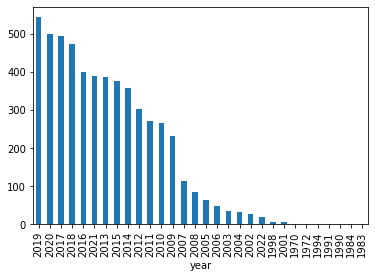

In [27]:
df.groupby('year').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

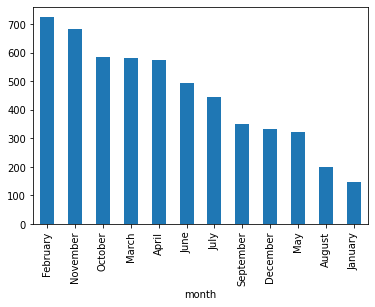

In [28]:
df.groupby('month').size().sort_values(ascending=False).plot(kind='bar')

# month wise analysis of 2018

In [29]:
df_new=df[df['year']=='2018']
df_new.head()

,title,author,date,views,likes,link,view_to_like_ratio,month,year
440,The Trans Ban,Conversations with People Who Hate Me,April 2018,11000,349,https://ted.com/talks/conversations_with_peopl...,31.52,April,2018
791,What foods did your ancestors love?,Aparna Pallavi,December 2018,2100000,63000,https://ted.com/talks/aparna_pallavi_what_food...,33.33,December,2018
899,The benefits of expressing your emotions (cons...,Artūrs Miksons,November 2018,278000,8300,https://ted.com/talks/arturs_miksons_the_benef...,33.49,November,2018
962,"Without farmers, you'd be hungry, naked and sober",Eric Sannerud,October 2018,2100000,63000,https://ted.com/talks/eric_sannerud_without_fa...,33.33,October,2018
997,How to design gender bias out of your workplace,Sara Sanford,November 2018,2300000,69000,https://ted.com/talks/sara_sanford_how_to_desi...,33.33,November,2018


<AxesSubplot:xlabel='month'>

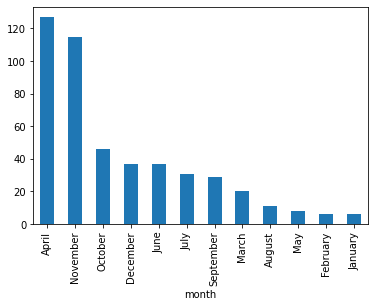

In [30]:
df_new.groupby('month').size().sort_values(ascending=False).plot(kind='bar')